<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-600777-1697643084/blob/main/ASD_DETECTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASET

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/smartinternz02/SI-GuidedProject-600777-1697643084/main/autism_screening.csv")

In [3]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


# DATA PREPROCESSING

## EDA

In [4]:
df.shape

(704, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [6]:
df.isnull().any()

A1_Score           False
A2_Score           False
A3_Score           False
A4_Score           False
A5_Score           False
A6_Score           False
A7_Score           False
A8_Score           False
A9_Score           False
A10_Score          False
age                 True
gender             False
ethnicity          False
jundice            False
austim             False
contry_of_res      False
used_app_before    False
result             False
age_desc           False
relation           False
Class/ASD          False
dtype: bool

In [7]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [8]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [9]:
data = df.dropna()
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [10]:
data.shape

(702, 21)

In [11]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,29.698006,4.883191
std,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,16.507465,2.498051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         702 non-null    int64  
 1   A2_Score         702 non-null    int64  
 2   A3_Score         702 non-null    int64  
 3   A4_Score         702 non-null    int64  
 4   A5_Score         702 non-null    int64  
 5   A6_Score         702 non-null    int64  
 6   A7_Score         702 non-null    int64  
 7   A8_Score         702 non-null    int64  
 8   A9_Score         702 non-null    int64  
 9   A10_Score        702 non-null    int64  
 10  age              702 non-null    float64
 11  gender           702 non-null    object 
 12  ethnicity        702 non-null    object 
 13  jundice          702 non-null    object 
 14  austim           702 non-null    object 
 15  contry_of_res    702 non-null    object 
 16  used_app_before  702 non-null    object 
 17  result          

In [13]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [14]:
data.ethnicity.nunique()

12

In [15]:
data.ethnicity.unique()

array(['White-European', 'Latino', '?', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish', 'others'], dtype=object)

In [16]:
data.ethnicity.value_counts()

White-European     233
Asian              123
?                   93
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: ethnicity, dtype: int64

In [17]:
data.jundice.unique()

array(['no', 'yes'], dtype=object)

In [18]:
data.austim.value_counts()

no     611
yes     91
Name: austim, dtype: int64

In [19]:
data.contry_of_res.nunique()

67

In [20]:
print(data.contry_of_res.value_counts())

United States           113
United Arab Emirates     82
New Zealand              81
India                    81
United Kingdom           77
                       ... 
China                     1
Chile                     1
Lebanon                   1
Burundi                   1
Cyprus                    1
Name: contry_of_res, Length: 67, dtype: int64


In [21]:
data.used_app_before.value_counts()

no     690
yes     12
Name: used_app_before, dtype: int64

In [22]:
data.age_desc.value_counts()

18 and more    702
Name: age_desc, dtype: int64

In [23]:
data.relation.value_counts()

Self                        522
?                            93
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: relation, dtype: int64

In [24]:
data['Class/ASD'].value_counts()

NO     513
YES    189
Name: Class/ASD, dtype: int64

## DATA CLEANING

Removing columns ["contry_of_res","age_desc"]
* country_of_res - Describe the country of residence of indivisuals , not enough significant data to create conclusion
* age_desc - Describes if someone is above 18 or not, which is redundant as not only is age given but also that everyone is above 18

In [25]:
clean_data = data.drop(columns = ["contry_of_res","age_desc"],axis=1)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 703
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         702 non-null    int64  
 1   A2_Score         702 non-null    int64  
 2   A3_Score         702 non-null    int64  
 3   A4_Score         702 non-null    int64  
 4   A5_Score         702 non-null    int64  
 5   A6_Score         702 non-null    int64  
 6   A7_Score         702 non-null    int64  
 7   A8_Score         702 non-null    int64  
 8   A9_Score         702 non-null    int64  
 9   A10_Score        702 non-null    int64  
 10  age              702 non-null    float64
 11  gender           702 non-null    object 
 12  ethnicity        702 non-null    object 
 13  jundice          702 non-null    object 
 14  austim           702 non-null    object 
 15  used_app_before  702 non-null    object 
 16  result           702 non-null    float64
 17  relation        

In [26]:
clean_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,no,6.0,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,no,5.0,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,no,8.0,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,no,6.0,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,no,2.0,?,NO


## Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
clean_data.gender = le.fit_transform(clean_data.gender)
clean_data.ethnicity = le.fit_transform(clean_data.ethnicity)
clean_data.jundice = le.fit_transform(clean_data.jundice)
clean_data.austim = le.fit_transform(clean_data.austim)
clean_data.used_app_before = le.fit_transform(clean_data.used_app_before)
clean_data.relation = le.fit_transform(clean_data.relation)
clean_data["Class/ASD"] = le.fit_transform(clean_data["Class/ASD"])
clean_data.head(25)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,10,0,0,0,6.0,5,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,4,0,1,0,5.0,5,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,4,1,1,0,8.0,3,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,10,0,1,0,6.0,5,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,0,2.0,0,0
5,1,1,1,1,1,0,1,1,1,1,36.0,1,6,1,0,0,9.0,5,1
6,0,1,0,0,0,0,0,1,0,0,17.0,0,2,0,0,0,2.0,5,0
7,1,1,1,1,0,0,0,0,1,0,64.0,1,10,0,0,0,5.0,3,0
8,1,1,0,0,1,0,0,1,1,1,29.0,1,10,0,0,0,6.0,5,0
9,1,1,1,1,0,1,1,1,1,0,17.0,1,1,1,1,0,8.0,1,1


In [30]:
clean_data.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,used_app_before,result,relation,Class/ASD
A1_Score,1.000000,0.012033,0.070229,0.123898,0.170253,0.107769,0.219444,0.142301,0.142904,0.118341,0.023059,-0.075594,0.135900,-0.020668,0.096239,-0.041378,0.394739,0.098463,0.296099
A2_Score,0.012033,1.000000,0.224762,0.159718,0.151401,0.186408,-0.044838,0.035919,0.206045,0.066231,0.020824,-0.044654,0.190571,0.112884,0.074783,-0.009623,0.392229,0.065516,0.312159
A3_Score,0.070229,0.224762,1.000000,0.411198,0.265631,0.267671,0.078866,0.014268,0.313894,0.168516,0.029504,0.000685,0.201709,0.060981,0.112848,0.055043,0.551552,0.124116,0.440248
A4_Score,0.123898,0.159718,0.411198,1.000000,0.307682,0.293951,0.152150,0.004794,0.326397,0.211155,0.032539,-0.056789,0.233603,0.064086,0.193043,0.022731,0.585232,0.112183,0.469136
A5_Score,0.170253,0.151401,0.265631,0.307682,1.000000,0.393140,0.236398,0.102513,0.397423,0.265461,-0.025095,-0.036949,0.126319,0.034435,0.090159,0.000376,0.640141,0.153108,0.538055
A6_Score,0.107769,0.186408,0.267671,0.293951,0.393140,1.000000,0.176153,0.097996,0.478777,0.294771,0.034705,-0.083858,0.208435,0.077831,0.113444,0.087193,0.630066,0.088850,0.591647
A7_Score,0.219444,-0.044838,0.078866,0.152150,0.236398,0.176153,1.000000,0.086408,0.190224,0.250011,-0.026533,0.064994,0.047416,0.031059,-0.008441,-0.022476,0.455045,0.069099,0.352430
A8_Score,0.142301,0.035919,0.014268,0.004794,0.102513,0.097996,0.086408,1.000000,0.099381,0.100618,-0.080438,0.064223,0.023005,0.010854,0.033447,-0.041776,0.321307,0.093527,0.235557
A9_Score,0.142904,0.206045,0.313894,0.326397,0.397423,0.478777,0.190224,0.099381,1.000000,0.283660,0.054004,0.006870,0.154127,0.057114,0.167034,0.049342,0.661237,0.067886,0.635147
A10_Score,0.118341,0.066231,0.168516,0.211155,0.265461,0.294771,0.250011,0.100618,0.283660,1.000000,-0.008085,-0.052542,0.159702,0.052146,0.118006,-0.041980,0.536713,0.130060,0.386435


<Axes: >

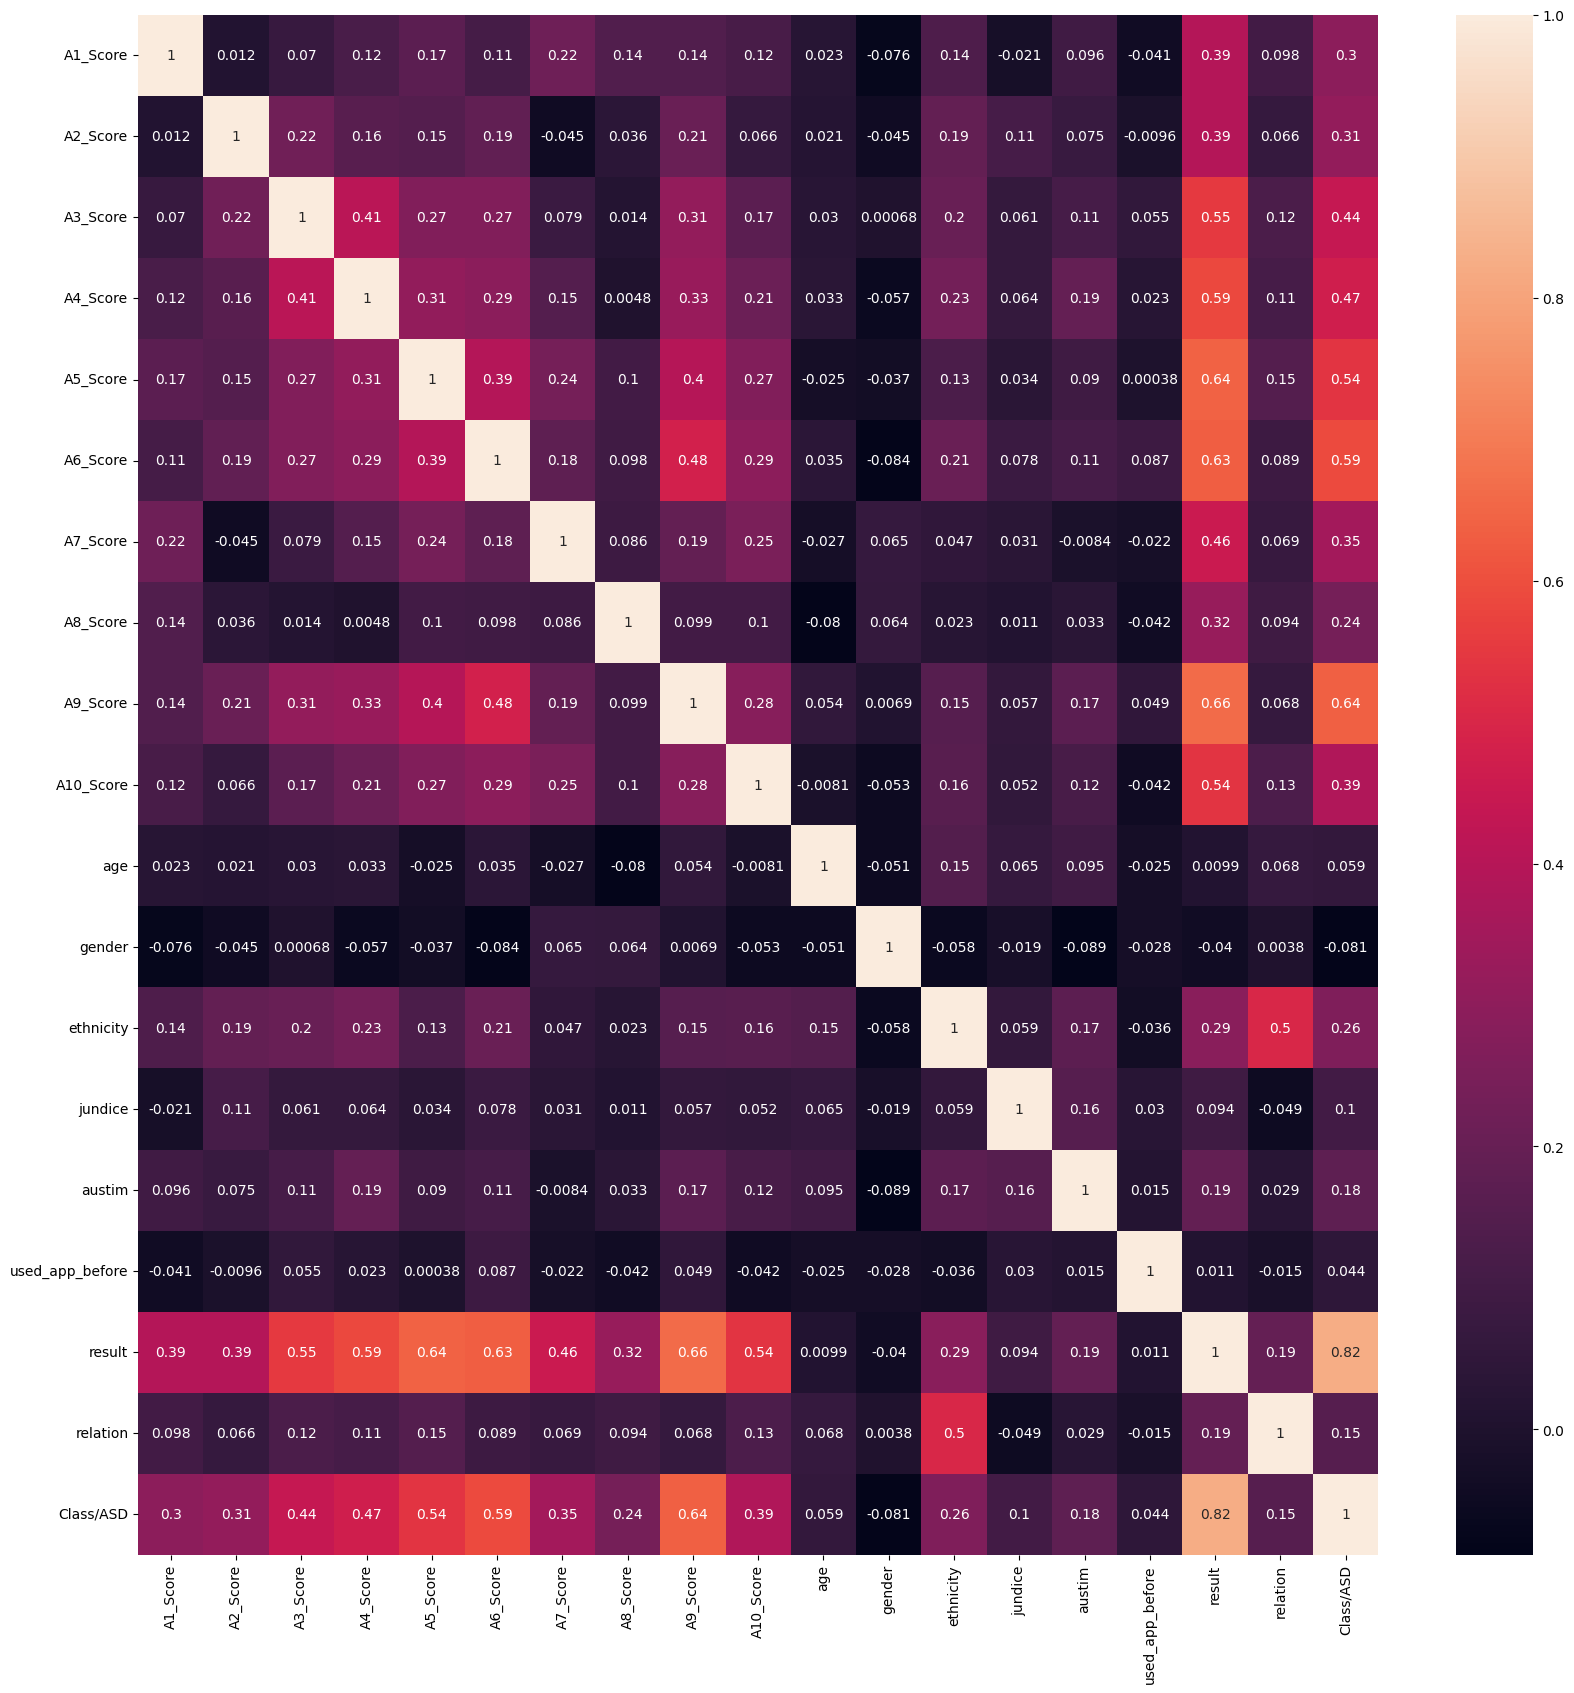

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(clean_data.corr(),annot=True)

In [32]:
main_df = clean_data.drop(columns = ["gender"],axis=1)
main_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jundice,austim,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,10,0,0,0,6.0,5,0
1,1,1,0,1,0,0,0,1,0,1,24.0,4,0,1,0,5.0,5,0
2,1,1,0,1,1,0,1,1,1,1,27.0,4,1,1,0,8.0,3,1
3,1,1,0,1,0,0,1,1,0,1,35.0,10,0,1,0,6.0,5,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,10,0,0,0,7.0,5,1
700,1,0,0,0,0,0,0,1,0,1,34.0,3,0,0,0,3.0,3,0
701,1,0,1,1,1,0,1,1,0,1,24.0,0,0,0,0,7.0,0,1
702,1,0,0,1,1,0,1,0,1,1,35.0,8,0,0,0,6.0,5,0


In [33]:
main_df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jundice,austim,used_app_before,result,relation,Class/ASD
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,29.698006,5.320513,0.098291,0.129630,0.017094,4.883191,4.111111,0.269231
std,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,16.507465,3.968292,0.297919,0.336135,0.129714,2.498051,1.733834,0.443876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,0.000000,0.000000,0.000000,7.000000,5.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,11.000000,1.000000,1.000000,1.000000,10.000000,5.000000,1.000000


## Outlier Detection and removal

<Axes: >

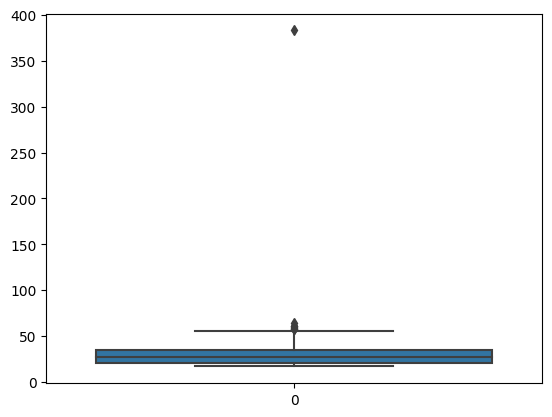

In [34]:
sns.boxplot(main_df.age)

In [35]:
## using Z - score
from scipy import stats

In [36]:
age_zscore = stats.zscore(main_df.age)
age_zscore

0     -0.224180
1     -0.345424
2     -0.163558
3      0.321417
4      0.624526
         ...   
699   -0.284802
700    0.260795
701   -0.345424
702    0.321417
703   -0.224180
Name: age, Length: 702, dtype: float64

<Axes: >

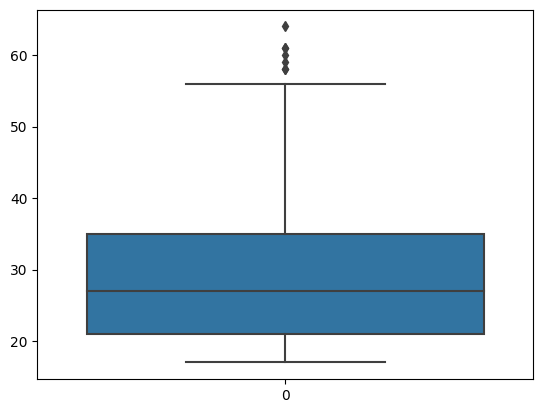

In [37]:
df_z = main_df[np.abs(age_zscore)<=3]
sns.boxplot(df_z.age)

# SPLITTING DATA INTO X AND Y

In [38]:
X = df_z.drop(columns = ['Class/ASD'],axis = 1)
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jundice,austim,used_app_before,result,relation
0,1,1,1,1,0,0,1,1,0,0,26.0,10,0,0,0,6.0,5
1,1,1,0,1,0,0,0,1,0,1,24.0,4,0,1,0,5.0,5
2,1,1,0,1,1,0,1,1,1,1,27.0,4,1,1,0,8.0,3
3,1,1,0,1,0,0,1,1,0,1,35.0,10,0,1,0,6.0,5
4,1,0,0,0,0,0,0,1,0,0,40.0,0,0,0,0,2.0,0


In [39]:
y = df_z["Class/ASD"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Class/ASD, dtype: int64

## Train test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [41]:
X_train.shape, X_test.shape, y_train.shape ,y_test.shape

((560, 17), (141, 17), (560,), (141,))

In [42]:
X_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jundice,austim,used_app_before,result,relation
168,0,0,1,1,1,0,0,1,1,1,36.0,4,0,1,0,6.0,5
545,1,0,1,1,1,1,1,0,0,1,35.0,10,1,0,0,7.0,5
287,1,0,0,1,1,0,0,1,0,1,40.0,10,0,0,0,5.0,5
363,0,1,0,1,0,0,0,0,0,0,24.0,5,0,0,0,2.0,5
113,0,1,0,0,0,0,0,1,1,1,27.0,1,0,0,0,4.0,5


# MODEL TRAINING

## Logistic Regression

In [43]:
import os
import cv2
import numpy as np
from skimage import io, color, segmentation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


In [45]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

In [46]:
   def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

In [47]:
import numpy as np

class YourClassName:
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


In [48]:
 def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

In [49]:
class YourClass:
    def __init__(self, X):
        # Initialize self.theta with np.zeros
        self.theta = np.zeros(X.shape[1])


In [50]:
class YourClass:
    def __init__(self, X, num_iter, lr):
        self.X = X
        self.num_iter = num_iter
        self.lr = lr
        self.theta = np.zeros(X.shape[1])

    def __sigmoid(self, z):
        # Implementation of the sigmoid function
        pass

    def __loss(self, h, y):
        # Implementation of the loss function
        pass

    def fit(self, y):
        for i in range(self.num_iter):
            z = np.dot(self.X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(self.X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            z = np.dot(self.X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)


In [51]:
class LinearRegression:
    def __init__(self, X, y):
        self.theta = np.zeros(X.shape[1])

In [52]:
class YourClass:
    def __init__(self, X, num_iter, lr, verbose=True):
        self.X = X
        self.num_iter = num_iter
        self.lr = lr
        self.theta = np.zeros(X.shape[1])
        self.verbose = verbose  # Assuming verbose is an attribute of the class.

    def __sigmoid(self, z):
        # Implementation of the sigmoid function
        pass

    def __loss(self, h, y):
        # Implementation of the loss function
        pass

    def fit(self, y):
        for i in range(self.num_iter):
            z = np.dot(self.X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(self.X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            z = np.dot(self.X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)

            if self.verbose and i % 10000 == 0:
                print(f'loss: {loss} \t')


In [53]:
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_prob(X).round()


In [54]:
#read data
df=pd.read_csv("https://raw.githubusercontent.com/smartinternz02/SI-GuidedProject-600777-1697643084/main/autism_screening.csv")

In [55]:
print(df.columns)


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [56]:
X = np.array(X)

In [57]:
print(len(X))

701


In [58]:
print("Length of y")
print(len(y))

print("DataFrame head")
print(df.head())


Length of y
701
DataFrame head
   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice austim  \
0         1         0          0  ...       f  White-European      no     no   
1         1         0          1  ...       m          Latino      no    yes   
2         1         1          1  ...       m          Latino     yes    yes   
3         1         0          1  ...       f  White-European      no    yes   
4         1         0          0  ...       f               ?      no     no   

   contry_of_res used_app_before resu

In [59]:
import numpy as np

# Convert the list 'y' to a NumPy array
y = np.array(y)

# Now you can access the shape attribute
print("Shape of y:", y.shape)
print("Shape of X:", X.shape)



Shape of y: (701,)
Shape of X: (701, 17)


In [60]:
import numpy as np
from sklearn.model_selection import train_test_split

# Create some sample data
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print the shape of the training and test sets
print(X_train.shape)
print(X_test.shape)

(560, 17)
(141, 17)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit your scikit-learn logistic regression model
modelSklearn = LogisticRegression()
modelSklearn.fit(X_train, Y_train)

# Make predictions and evaluate the scikit-learn model
predsSklearn = modelSklearn.predict(X_test)
print("Sklearn predictions: ", predsSklearn)
print("Sklearn model score: ", (predsSklearn == Y_test).mean())


Sklearn predictions:  [0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1]
Sklearn model score:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
import os

import glob

path = 'C:/Users/mail2/Desktop/flippin/pics/'
i = 0

for infile in glob.glob( os.path.join(path, '*.jpg') ):

    img = Image.open(infile)
    print ("current file is: " + infile)
    img.transpose(Image.FLIP_LEFT_RIGHT)
    img.transpose(Image.FLIP_TOP_BOTTOM)
    img.transpose(
        Image.FLIP_LEFT_RIGHT).transpose(
        Image.FLIP_TOP_BOTTOM).save("combined%s.jpg")
print('done')

done


## KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
# Initialize the model

knn = KNeighborsClassifier()

In [65]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [66]:
ypred = knn.predict(X_test)

In [67]:
ypred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1])

In [68]:
y_test

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1])

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        98
           1       0.93      0.93      0.93        43

    accuracy                           0.96       141
   macro avg       0.95      0.95      0.95       141
weighted avg       0.96      0.96      0.96       141



In [71]:
confusion_matrix(y_test,ypred)

array([[95,  3],
       [ 3, 40]])

## Random Forests



In [72]:
import pandas as pd
import numpy as np

In [73]:
from sklearn.metrics import accuracy_score,classification_report


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [75]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(criterion='entropy')

In [76]:
model2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [77]:
r_y_predict = model2.predict(X_test)
r_y_predict_train = model2.predict(X_train)

In [78]:
print('Testing Accuracy = ', accuracy_score(y_test,r_y_predict))
print('Training Accuracy = ', accuracy_score(y_train,r_y_predict_train))

Testing Accuracy =  1.0
Training Accuracy =  1.0


In [79]:
pd.crosstab(y_test,r_y_predict)

col_0,0,1
row_0,,
0,98,0
1,0,43


In [80]:
print(classification_report(y_test,r_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        43

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [81]:
import pickle

In [82]:
pickle.dump(model2,open('ASD.pkl','wb'))

## NEURAL NETWORKS

In [ ]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
18/18 [==============================] - 12s 31ms/step - loss: 4.0215 - accuracy: 0.7393 - val_loss: 4.7041 - val_accuracy: 0.6950
Epoch 2/10
18/18 [==============================] - 0s 12ms/step - loss: 4.0215 - accuracy: 0.7393 - val_loss: 4.7041 - val_accuracy: 0.6950
Epoch 3/10
18/18 [==============================] - 0s 12ms/step - loss: 4.0215 - accuracy: 0.7393 - val_loss: 4.7041 - val_accuracy: 0.6950
Epoch 4/10
18/18 [==============================] - 0s 8ms/step - loss: 4.0215 - accuracy: 0.7393 - val_loss: 4.7041 - val_accuracy: 0.6950
Epoch 5/10
18/18 [==============================] - 0s 13ms/step - loss: 4.0215 - accuracy: 0.7393 - val_loss: 4.7041 - val_accuracy: 0.6950
Epoch 6/10
18/18 [==============================] - 0s 9ms/step - loss: 4.0215 - accuracy: 0.7393 - val_loss: 4.7041 - val_accuracy: 0.6950
Epoch 7/10
18/18 [==============================] - 0s 12ms/step - loss: 4.0215 - accuracy: 0.7393 - val_loss: 4.7041 - val_accuracy: 0.6950
Epoch 8/10
18/

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
18/18 [==============================] - 2s 18ms/step - loss: 1.8055 - accuracy: 0.6536 - val_loss: 0.4995 - val_accuracy: 0.8227
Epoch 2/10
18/18 [==============================] - 0s 6ms/step - loss: 0.4498 - accuracy: 0.7982 - val_loss: 0.4351 - val_accuracy: 0.8085
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 0.4073 - accuracy: 0.8089 - val_loss: 0.4174 - val_accuracy: 0.8085
Epoch 4/10
18/18 [==============================] - 0s 12ms/step - loss: 0.3975 - accuracy: 0.8268 - val_loss: 0.5471 - val_accuracy: 0.7305
Epoch 5/10
18/18 [==============================] - 0s 7ms/step - loss: 0.4029 - accuracy: 0.8250 - val_loss: 0.5165 - val_accuracy: 0.7163
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 0.3865 - accuracy: 0.8375 - val_loss: 0.3866 - val_accuracy: 0.8511
Epoch 7/10
18/18 [==============================] - 0s 9ms/step - loss: 0.3741 - accuracy: 0.8411 - val_loss: 0.3694 - val_accuracy: 0.8369
Epoch 8/10
18/18 [

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

history_3 = model_3.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
18/18 [==============================] - 4s 23ms/step - loss: 0.8206 - accuracy: 0.6304 - val_loss: 0.7025 - val_accuracy: 0.4681
Epoch 2/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6595 - accuracy: 0.6964 - val_loss: 0.6410 - val_accuracy: 0.6879
Epoch 3/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6027 - accuracy: 0.7179 - val_loss: 0.6739 - val_accuracy: 0.6950
Epoch 4/10
18/18 [==============================] - 0s 8ms/step - loss: 0.6039 - accuracy: 0.7125 - val_loss: 0.8063 - val_accuracy: 0.6950
Epoch 5/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6015 - accuracy: 0.7411 - val_loss: 0.6612 - val_accuracy: 0.6950
Epoch 6/10
18/18 [==============================] - 0s 12ms/step - loss: 0.5647 - accuracy: 0.7393 - val_loss: 0.6108 - val_accuracy: 0.8014
Epoch 7/10
18/18 [==============================] - 0s 12ms/step - loss: 0.5500 - accuracy: 0.7446 - val_loss: 0.5631 - val_accuracy: 0.7163
Epoch 8/10
18/

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

history_4 = model_4.fit(X_train, y_train, epochs=150,validation_data=(X_test,y_test))

Epoch 1/150
18/18 [==============================] - 3s 28ms/step - loss: 0.7482 - accuracy: 0.7054 - val_loss: 0.5797 - val_accuracy: 0.7092
Epoch 2/150
18/18 [==============================] - 0s 10ms/step - loss: 0.5059 - accuracy: 0.7911 - val_loss: 0.4326 - val_accuracy: 0.8723
Epoch 3/150
18/18 [==============================] - 0s 13ms/step - loss: 0.4259 - accuracy: 0.8268 - val_loss: 0.4009 - val_accuracy: 0.8440
Epoch 4/150
18/18 [==============================] - 0s 8ms/step - loss: 0.3987 - accuracy: 0.8321 - val_loss: 1.0565 - val_accuracy: 0.6950
Epoch 5/150
18/18 [==============================] - 0s 9ms/step - loss: 0.4885 - accuracy: 0.8000 - val_loss: 0.5119 - val_accuracy: 0.7730
Epoch 6/150
18/18 [==============================] - 0s 13ms/step - loss: 0.4057 - accuracy: 0.8250 - val_loss: 0.3447 - val_accuracy: 0.8511
Epoch 7/150
18/18 [==============================] - 0s 12ms/step - loss: 0.3623 - accuracy: 0.8554 - val_loss: 0.4417 - val_accuracy: 0.7660
Epoch 8/

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(150,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_4")

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

history_4 = model_4.fit(X_train, y_train, epochs=150,validation_data=(X_test,y_test),callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/150
18/18 [==============================] - 2s 51ms/step - loss: 0.6426 - accuracy: 0.7393 - val_loss: 0.5411 - val_accuracy: 0.8156
Epoch 2/150
18/18 [==============================] - 1s 33ms/step - loss: 0.5124 - accuracy: 0.7929 - val_loss: 0.4805 - val_accuracy: 0.8014
Epoch 3/150
18/18 [==============================] - 1s 34ms/step - loss: 0.4592 - accuracy: 0.8196 - val_loss: 0.4435 - val_accuracy: 0.8369
Epoch 4/150
18/18 [==============================] - 0s 5ms/step - loss: 0.4389 - accuracy: 0.8161 - val_loss: 0.6059 - val_accuracy: 0.7163
Epoch 5/150
18/18 [==============================] - 0s 5ms/step - loss: 0.4307 - accuracy: 0.8321 - val_loss: 0.5414 - val_accuracy: 0.7518
Epoch 6/150
18/18 [==============================] - 1s 33ms/step - loss: 0.4086 - accuracy: 0.8393 - val_loss: 0.3399 - val_accuracy: 0.8865
Epoch 7/150
18/18 [==============================] - 0s 5ms/step - loss: 0.3651 - accuracy: 0.8607 - val_loss: 0.4826 - val_accuracy: 0.7234
Epoch 8/1

In [ ]:
model_4.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.9504


[0.10199040919542313, 0.9503546357154846]

In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4/")
model_4.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0774 - accuracy: 0.9787


[0.07742727547883987, 0.978723406791687]

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(250,activation="relu"),
    tf.keras.layers.Dense(150,activation="relu"),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_5")

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

history_5 = model_5.fit(X_train, y_train, epochs=250,validation_data=(X_test,y_test),callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/250
18/18 [==============================] - 2s 50ms/step - loss: 0.7174 - accuracy: 0.6893 - val_loss: 0.5864 - val_accuracy: 0.7305
Epoch 2/250
18/18 [==============================] - 1s 50ms/step - loss: 0.5486 - accuracy: 0.7643 - val_loss: 0.4590 - val_accuracy: 0.8511
Epoch 3/250
18/18 [==============================] - 2s 100ms/step - loss: 0.4360 - accuracy: 0.8286 - val_loss: 0.4075 - val_accuracy: 0.8652
Epoch 4/250
18/18 [==============================] - 0s 14ms/step - loss: 0.4167 - accuracy: 0.8214 - val_loss: 1.0480 - val_accuracy: 0.6950
Epoch 5/250
18/18 [==============================] - 0s 13ms/step - loss: 0.4765 - accuracy: 0.8143 - val_loss: 0.5600 - val_accuracy: 0.7163
Epoch 6/250
18/18 [==============================] - 1s 48ms/step - loss: 0.4324 - accuracy: 0.8071 - val_loss: 0.3365 - val_accuracy: 0.9007
Epoch 7/250
18/18 [==============================] - 0s 18ms/step - loss: 0.3674 - accuracy: 0.8554 - val_loss: 0.5129 - val_accuracy: 0.6950
Epoch

In [ ]:
model_5.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9787


[0.06672469526529312, 0.978723406791687]

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5/")
model_5.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9787


[0.06118996813893318, 0.978723406791687]

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(250,activation="relu"),
    tf.keras.layers.Dense(150,activation="relu"),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_6")

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

history_6 = model_6.fit(X_train, y_train, epochs=250,validation_data=(X_test,y_test),callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/250
18/18 [==============================] - 2s 72ms/step - loss: 0.5845 - accuracy: 0.7214 - val_loss: 0.5479 - val_accuracy: 0.7801
Epoch 2/250
18/18 [==============================] - 1s 53ms/step - loss: 0.5134 - accuracy: 0.7893 - val_loss: 0.4721 - val_accuracy: 0.8440
Epoch 3/250
18/18 [==============================] - 1s 56ms/step - loss: 0.4297 - accuracy: 0.8446 - val_loss: 0.4096 - val_accuracy: 0.8511
Epoch 4/250
18/18 [==============================] - 0s 8ms/step - loss: 0.4030 - accuracy: 0.8250 - val_loss: 0.9570 - val_accuracy: 0.6950
Epoch 5/250
18/18 [==============================] - 0s 8ms/step - loss: 0.4598 - accuracy: 0.8286 - val_loss: 0.6402 - val_accuracy: 0.7163
Epoch 6/250
18/18 [==============================] - 1s 42ms/step - loss: 0.4664 - accuracy: 0.7929 - val_loss: 0.3916 - val_accuracy: 0.8511
Epoch 7/250
18/18 [==============================] - 0s 6ms/step - loss: 0.3887 - accuracy: 0.8518 - val_loss: 0.5622 - val_accuracy: 0.6667
Epoch 8/2

In [ ]:
model_6.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0658 - accuracy: 0.9716


[0.06581150740385056, 0.9716312289237976]

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6/")
model_6.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9787


[0.0531863234937191, 0.978723406791687]

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(250,activation="linear"),
    tf.keras.layers.Dense(150,activation="relu"),
    tf.keras.layers.Dense(120,activation="linear"),
    tf.keras.layers.Dense(20,activation="tanh"),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_7")

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

history_7 = model_7.fit(X_train, y_train, epochs=250,validation_data=(X_test,y_test),callbacks=[create_model_checkpoint(model_name=model_7.name)])

Epoch 1/250
18/18 [==============================] - 4s 96ms/step - loss: 0.5567 - accuracy: 0.7232 - val_loss: 0.5697 - val_accuracy: 0.6950
Epoch 2/250
18/18 [==============================] - 1s 61ms/step - loss: 0.4466 - accuracy: 0.7875 - val_loss: 0.4091 - val_accuracy: 0.8085
Epoch 3/250
18/18 [==============================] - 1s 45ms/step - loss: 0.3959 - accuracy: 0.8393 - val_loss: 0.3596 - val_accuracy: 0.8369
Epoch 4/250
18/18 [==============================] - 1s 42ms/step - loss: 0.3420 - accuracy: 0.8500 - val_loss: 0.3471 - val_accuracy: 0.8865
Epoch 5/250
18/18 [==============================] - 0s 6ms/step - loss: 0.3165 - accuracy: 0.8696 - val_loss: 0.3844 - val_accuracy: 0.8085
Epoch 6/250
18/18 [==============================] - 1s 42ms/step - loss: 0.3049 - accuracy: 0.8643 - val_loss: 0.3028 - val_accuracy: 0.8794
Epoch 7/250
18/18 [==============================] - 1s 43ms/step - loss: 0.3088 - accuracy: 0.8625 - val_loss: 0.2568 - val_accuracy: 0.9007
Epoch 8

In [ ]:
model_7.evaluate(X_test,y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.0513 - accuracy: 0.9929


[0.05128715559840202, 0.9929078221321106]

In [ ]:
model_7 = tf.keras.models.load_model("model_experiments/model_7/")
model_7.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9929


[0.027588030323386192, 0.9929078221321106]

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(250,activation="relu"),
    tf.keras.layers.Dense(150,activation="relu"),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(20,activation="tanh"),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_8")

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

history_8 = model_8.fit(X_train, y_train, epochs=350,validation_data=(X_test,y_test),
                        callbacks=[create_model_checkpoint(model_name=model_8.name)])

Epoch 1/350
18/18 [==============================] - 2s 51ms/step - loss: 0.5878 - accuracy: 0.7179 - val_loss: 0.5183 - val_accuracy: 0.9291
Epoch 2/350
18/18 [==============================] - 1s 39ms/step - loss: 0.4567 - accuracy: 0.8143 - val_loss: 0.4161 - val_accuracy: 0.7589
Epoch 3/350
18/18 [==============================] - 1s 39ms/step - loss: 0.3957 - accuracy: 0.8357 - val_loss: 0.3739 - val_accuracy: 0.9291
Epoch 4/350
18/18 [==============================] - 0s 6ms/step - loss: 0.3728 - accuracy: 0.8607 - val_loss: 0.7088 - val_accuracy: 0.7092
Epoch 5/350
18/18 [==============================] - 0s 6ms/step - loss: 0.4199 - accuracy: 0.8268 - val_loss: 0.5834 - val_accuracy: 0.7163
Epoch 6/350
18/18 [==============================] - 1s 39ms/step - loss: 0.3798 - accuracy: 0.8446 - val_loss: 0.3144 - val_accuracy: 0.9220
Epoch 7/350
18/18 [==============================] - 0s 6ms/step - loss: 0.3396 - accuracy: 0.8643 - val_loss: 0.4816 - val_accuracy: 0.7660
Epoch 8/3

In [ ]:
model_8.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.1486 - accuracy: 0.9291


[0.1485973447561264, 0.9290780425071716]

In [ ]:
model_8 = tf.keras.models.load_model("model_experiments/model_8/")
model_8.evaluate(X_test,y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.0483 - accuracy: 0.9787


[0.04832042381167412, 0.978723406791687]

In [ ]:
tf.random.set_seed(42)

final = tf.keras.Sequential([
    tf.keras.layers.Dense(250,activation="linear"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(120,activation="linear"),
    tf.keras.layers.Dense(20,activation="tanh"),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="final")

final.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

final_history = final.fit(X_train, y_train, epochs=300,validation_data=(X_test,y_test),
                        callbacks=[create_model_checkpoint(model_name=final.name)])

Epoch 1/300
18/18 [==============================] - 3s 56ms/step - loss: 0.4843 - accuracy: 0.7554 - val_loss: 0.3912 - val_accuracy: 0.8794
Epoch 2/300
18/18 [==============================] - 1s 46ms/step - loss: 0.3269 - accuracy: 0.8839 - val_loss: 0.2719 - val_accuracy: 0.8865
Epoch 3/300
18/18 [==============================] - 1s 43ms/step - loss: 0.2479 - accuracy: 0.9107 - val_loss: 0.2199 - val_accuracy: 0.9291
Epoch 4/300
18/18 [==============================] - 0s 7ms/step - loss: 0.2859 - accuracy: 0.8821 - val_loss: 0.3411 - val_accuracy: 0.8085
Epoch 5/300
18/18 [==============================] - 0s 7ms/step - loss: 0.2880 - accuracy: 0.8518 - val_loss: 0.2831 - val_accuracy: 0.8865
Epoch 6/300
18/18 [==============================] - 1s 45ms/step - loss: 0.2164 - accuracy: 0.9089 - val_loss: 0.2055 - val_accuracy: 0.9291
Epoch 7/300
18/18 [==============================] - 0s 6ms/step - loss: 0.2175 - accuracy: 0.9196 - val_loss: 0.2660 - val_accuracy: 0.8794
Epoch 8/3

In [ ]:
final.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 1.0000


[0.004958361387252808, 1.0]

In [ ]:
final = tf.keras.models.load_model("model_experiments/final/")
final.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000


[0.003913191147148609, 1.0]

In [ ]:
final.save("Final_3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


FLASK


In [ ]:
import os
import joblib
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [ ]:
rf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
joblib.dump(rf, "./random_forest.joblib")

['./random_forest.joblib']

In [ ]:
loaded_rf = joblib.load("./random_forest.joblib")

In [ ]:
loaded_rf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
joblib.dump(rf, "RF_uncompressed.joblib", compress=0)

['RF_uncompressed.joblib']

In [ ]:
!pip install flask


In [ ]:
from flask import Flask,render_template,url_for,request,send_from_directory